# Activity: `Matplotlib` & `Astropy`

This activity aims to review some key elements of two useful Python packages for astronomy.

@P. Palma-Bifani

----- 
##### Timing:
- Matplotlib (**10'**)
- Activity 1 (**10'**)
- Astropy (**15'**)
- Activity 2 (**20'**)
- Closing (**5'**)


##### Roles for the activities:
- **Driver** (person who likes chocolate the most)
- **Moderator** (person who likes chocolate the least)
- **Navigators** (>= 1 person)



----- 
-----
### 1. `matplotlib.pyplot`

`matplotlib.pyplot` is a complete graphics module often used by Python developers. Check out [this gallery](https://matplotlib.org/gallery.html) to understand what you can do with pyplot.

This is by no means a comprehensive tutorial, but it will point out a few important things about `matplotlib.pyplot` objects and give advice about incorporating plotting functionality in your open-source astronomy software. There are other (excellent) plotting tools in astronomy, like Plotly, and Bokeh, but we will only discuss `matplotlib.pyplot` here.

---- 
**A state** 

`matplotlib.pyplot` relies on the **changing state** concept. The **state** of a programming environment is what determines the program's behavior. For example, when you type:

``` >> import orbitize```

You are modifying your environment's state. 

Before you typed ```import orbitize```, if you tried to run something like ```orbitize.plot.OrbitPlot()```, you would get an import error. However, in running the import command, you modified the state of your environment, and when you try ```orbitize.plot.OrbitPlot()```, you'll get something totally different! 

Nothing about the ```orbitize.plot.OrbitPlot()``` code changed, but because your environment's **state** changed, the output also changed.

The following sketch represents this idea visualy:

![](imgs/state_concept.jpeg)


A final excellent example of this concept as it applies to matplotlib is the `matplotlib.rcParams` object, which is like a dictionary that controls the default behaviors of matplotlib plots. When you type:

```>> import matplotlib```

The `matplotlib.rcParams` object is automatically defined with default values. This is how, for example, matplotlib knows how large to make fonts and figures. 

It also means that you can control the default behavior of matplotlib plots by updating the state via `matplotlib.rcParams`.

-----
Well, too many words...

![](imgs/import_plt.jpeg)



In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams



The basic "unit" of `matplotlib.pyplot` is [the `Figure` object](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html), which acts as a container for all the other plot elements. 

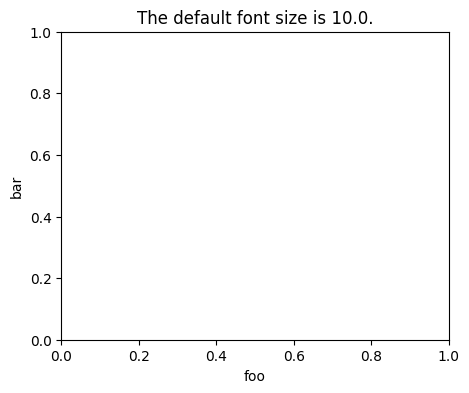

In [2]:
### make a plot
plt.figure(figsize=(5,4))
plt.title('The default font size is {}.'.format(rcParams['font.size']))
plt.xlabel('foo'); plt.ylabel('bar')
plt.show()


We'll start by using the `update()` method of `matplotlib.rcParams` to change the default font size and the [overall style](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


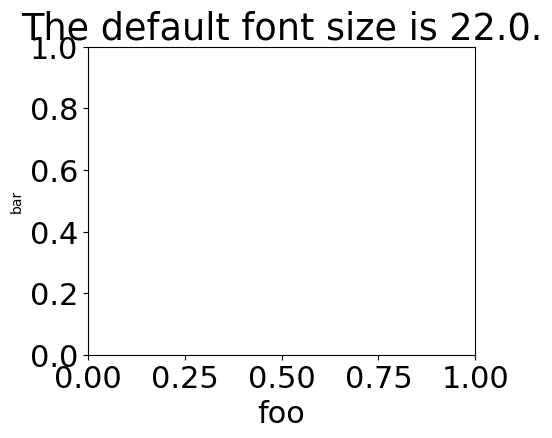

In [5]:
### update the current state. 
### This command doesn't have any output! 
rcParams.update({'font.size': 22})

### update the style
#print(plt.style.available)
#plt.style.use("dark_background")

# make another plot
plt.figure(figsize=(5,4))
plt.title('The default font size is {}.'.format(rcParams['font.size']))
plt.xlabel('foo'); plt.ylabel('bar', fontsize=10)
plt.show()

In [6]:
### update the current state again
rcParams.update({'font.size': 12})

As you can see, `matplotlib` decides on a default font size by checking the *current* value of the state parameter `rcParams['font.size']`, but this is always overwritten if you pass in a keyword (in this case, the font size of the y axis label).

You can modify several other parameters, as for example the default colors, linestyle, figure size, etc. 

Check [the documentation here](https://matplotlib.org/stable/tutorials/introductory/customizing.html) for more details.

----

A matplotlib `Figure` relies on the same **state** idea.

The current figure changes (i.e. the *state* is updated) when you initialize a new `Figure` object. Unless you specify a particular `Figure` object, `plt.___()` functions will always add to the current `Figure` object. That is a nice feature-- it makes it easy to add multiple types of plots onto the same figure.

Let's look at another way to initialize a new `Figure` object:

fig type: <class 'matplotlib.figure.Figure'>
ax type: <class 'numpy.ndarray'>
ax[0] type: <class 'matplotlib.axes._axes.Axes'>


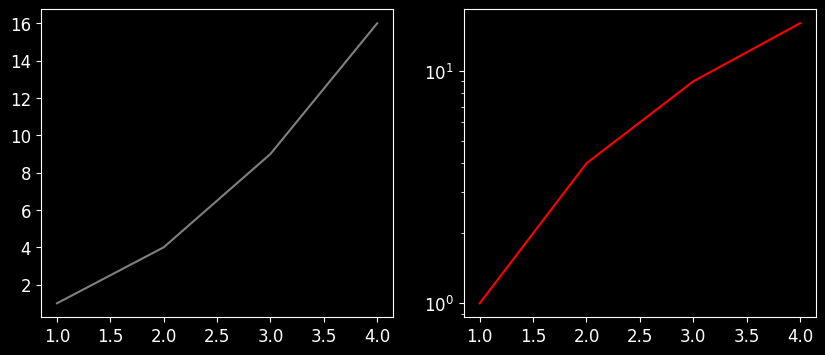

In [4]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
y_error = np.array([5, 1.2, 2, 5])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(x, y, color='grey')

#ax[1].plot(x, y, color='red')
#ax[1].set_yscale('log')

print('fig type: {}'.format(type(fig)))
print('ax type: {}'.format(type(ax)))
print('ax[0] type: {}'.format(type(ax[0])))
plt.show()

Here we've encountered another kind of object: [the `Axes` object](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). These objects are containers for all the plot elements *in a particular figure panel*. `Axes` are attributes of `Figure` objects:

Two useful methods to keep in mind are `plt.gca()` and `plt.sca()` (get/set current `Axes`). Let's see how they work:

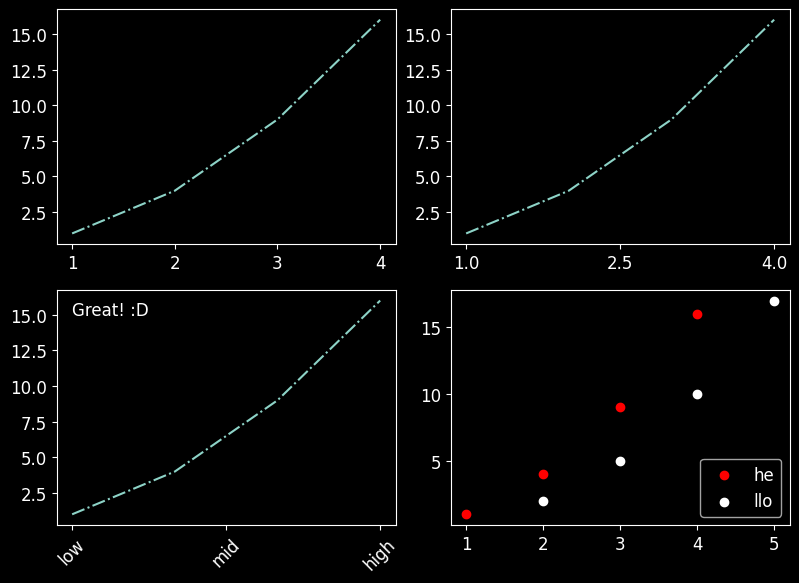

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

mystery_axes = plt.gca()              # get current Axes
mystery_axes.scatter(x, y, color='r', label='he')# acts on `mystery_axes`
mystery_axes.scatter(x + 1, y + 1, color='white', label='llo')
mystery_axes.legend(loc='lower right') #

###
#plt.sca(ax[0,0])        # set current Axes
#plt.plot(x, y, ls='-.') # acts on current Axes

###
#plt.sca(ax[0,1])        # set current Axes
#plt.plot(x, y, ls='-.') # acts on current Axes
#plt.xticks([1,2.5,4])

###
#plt.sca(ax[1,0])        # set current Axes
#plt.plot(x, y, ls='-.') # acts on current Axes
#plt.xticks([1,2.5,4], labels=['low','mid','high'], rotation=45)
#plt.text(1,15,'Great! :D')

plt.tight_layout()      # prettify
plt.show()

To find out more about how to modify the legend aspect you can [check this page](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html).

------

We can use `matplotlib.pyplot` to visualize 2D arrays too, which means any image. 

For this we can use `plt.imshow()`, which allows us to change many parameters. You can find the [documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).


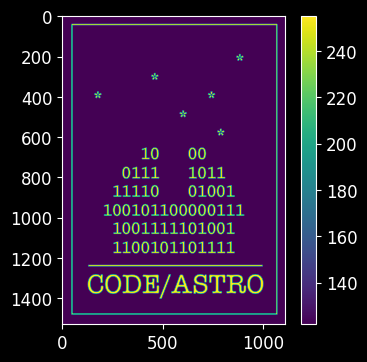

In [9]:
magic_image = np.loadtxt('magic_image.txt')

### A basic plot will look like this
plt.figure(figsize=(4,4))
plt.imshow(magic_image)
plt.colorbar()
plt.show()

We can make several changes. For this case we will take the axes off, change the colormap and save in different formats.


To asign colors you can create your own maps, but there are [several good ones here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

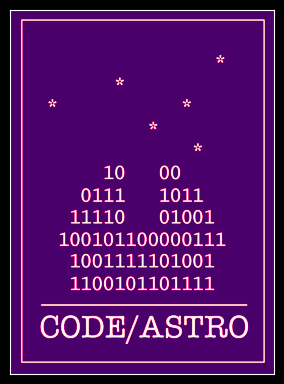

In [10]:
plt.figure(figsize=(4,4))
plt.imshow(magic_image, cmap='RdPu_r')

### We can eliminate the ticks too
#plt.xticks([]),plt.yticks([])

### Avoid cutting labels.
# plt.tight_layout() 

### save your plot
### you can define the format. 
#file_name = 'logo_codeastro' # The extentions can be png, pdf, ps, eps, and svg
#plt.savefig(file_name+'.png', dpi=None) # dpi sets the resolution in dots per inch.

plt.show()

------
#### `Activity #1`

Let's practice working with `Figure` and `Axes` objects. 

Run the code snippet below to generate some orbits and plot them using `orbitize!`

This code uses random sampling of a probability distribution to generate orbits consistent with data of a planet's position over time. 

Notice that the last line of this snippet returns the `Figure` object used to make the plot. This is good practice-- it lets your users more easily customize figures, just as you're about to do!

Tasks:
- Change the x-axis limits of the top right panel to 2011-2015.

- Add a colored star at (0, 0) in the leftmost panel.

- Change the dpi (dots per inch, a measure of resolution) of the Figure to 250.

- Save the figure to your Desktop using [`plt.savefig()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.savefig.html). 

- Paste your plots in [this Google Doc](https://docs.google.com/document/d/1KqO-EFO2PDdhoQN_A1_SivkQ8mpf5G4l2dAXELebvZ8/edit?usp=sharing) with your name and/or group number for everyone to admire!

<Figure size 1400x600 with 0 Axes>

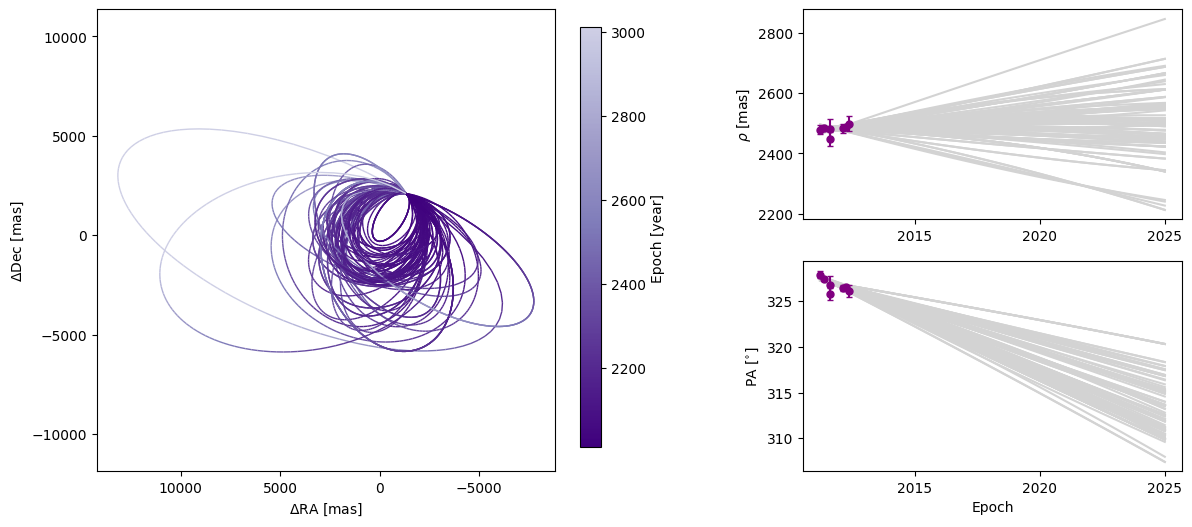

In [11]:
import orbitize.driver

### Let's go back to clasic plots style
plt.style.use("default")

### set up fit
myDriver = orbitize.driver.Driver(
    '{}/GJ504.csv'.format(orbitize.DATADIR),
    'OFTI', 1, 1.22, 56.95, mass_err=0.08, plx_err=0.26)
s = myDriver.sampler

### run orbitize!
orbits = s.run_sampler(100)
myResults = s.results

### make plot
epochs = myDriver.system.data_table['epoch']
orbit_figure = myResults.plot_orbits(start_mjd=epochs[0])

-----

### General tips:

- **Don't overengineer your plotting code.** 

You don't need to add a million keywords anticipating every possible tweak your users might wish to make. 

Focus on making it easy for your users to modify the code themselves. 

Make sure you return `Figure` and `Axes` objects (more on this below) to your user so they can easily modify plots.


- **Apply principles of good design.** 

Use color palettes with lots of contrast, make your fonts large and easy-to-read, and make sure your plots are colorblind friendly. (There are several great colorblindness simulators out there, for example [this one](https://www.color-blindness.com/coblis-color-blindness-simulator/).) 

It's also good to differentiate plot elements in more than one way (ex: one line is black and dashed, another is red and solid). 

------
------
### 2. `astropy`

`astropy` is full of useful stuff for astronomers (perhaps unsurprisingly). 

The main point we want to drive home with this tutorial is **DON'T REINVENT THE WHEEL**. 

Before you write a new function, especially one that performs a common astronomical task, check whether an `astropy` developer wrote it for you. In fact, astropy accepts community contributions too.

Below are some examples of a few particularly useful `astropy` features. Check out a more complete list of `astropy` tutorials [here](https://learn.astropy.org/). 

For the purpouse of this activity we will use some functions from `units`, `constants`, `io.fits`, `visualization`, and `utils.data`.


------

One of our favorite things about `astropy` is its ability to handle units and fundamental constants. 

Let's calculate the Earth's orbital velocity.


In [7]:
from astropy import constants as cst, units as u 

In [8]:
v_Earth = np.sqrt( cst.G * cst.M_sun / (1 * u.au))

v_Earth

<Quantity 1.15200885e+10 m(3/2) / (AU(1/2) s)>

Those units aren't very helpful. Let's convert them to more physical units.
All available units can he [found here](https://docs.astropy.org/en/stable/units/index.html).

In [14]:
v_Earth_cgs = v_Earth.cgs
v_Earth_si = v_Earth.si
v_Earth_km_s = v_Earth.to(u.km/u.s)

print(r"Earth's orbital velocity: {:.1f}.".format(v_Earth_cgs))
print(r"Another way to put it: {:.1f}.".format(v_Earth_si))
print(r"Best way (in my opinion): {:.1f}.".format(v_Earth_km_s))


Earth's orbital velocity: 2978469.2 cm / s.
Another way to put it: 29784.7 m / s.
Best way (in my opinion): 29.8 km / s.


In [16]:
print('Nicer format:')
v_Earth_km_s

Nicer format:


<Quantity 29.78469183 km / s>

-----

Next, a quick example with the second-worst bane of every astronomer's existence: coordinate systems. 

`astropy` has a great `coordinates` module that enables easy translation between coordinate systems. 

Note: if you are working with solar-sytem objects you must be very carfule with the reference system used by SkyCoord.

In [18]:
from astropy.coordinates import SkyCoord

### input coordinates as hour angle and degree
my_coordinate = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))

### access right ascension
print('Right Ascension (ra), Declination (dec)')
print(my_coordinate)

### convert to galactocentric coordinates
#print('Longitude (l), Latitude (b)')
#print(my_coordinate.galactic)

Right Ascension (ra), Declination (dec)
<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>


----

Now we will use astropy to read a `FITS` file and access its contents. 

**What is a `FITS` file?**

FITS was originally developed in the late 1970's as an archive and interchange format for astronomical data files

It is much more than just another image format (such as JPG or GIF) and is primarily designed to store scientific data sets consisting of multidimensional arrays and 2-dimensional tables containing rows and columns of data.

A `FITS` file consists of one or more Header + Data Units (`HDU`)

Every `HDU` consists of an ASCII formated **Header Unit** followed by an optional **Data Unit**, such as a 1-D spectrum, a 2-D image, or a 3-D data cube. 

Each **header unit** consists of any number of 80-character keyword records which have the general form:

```>> KEYNAME = value / comment string```

The purpose is to describe various aspects of the data, such as the date and time of the observation. 

![](imgs/fits.jpeg)

**Example:**

As an example, suppose you want to store a set of data containing images of the same object taken at 450, 600, and 700 nm wavelengths. 

FITS files allow you to store all of these images in one file (each one is stored in a different extension), along with relevant keywords (e.g. the name of the object, time of observation, etc) in the FITS file header. 

Feel free to Google around for more information about FITS files!

In [22]:
from astropy.io import fits

In [38]:
### open a test fits file
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')
hdul = fits.open(fits_image_filename)

### print a summary of the file contents
print('\n\nINFO ABOUT FITS FILE:')
print('---------------------')
hdul.info()

### print the contents of the .fits header
#print('\n\nFITS HEADER:')
#print('------------')
#print(repr(hdul[0].header))

### visualization
#data = hdul[1].data
#plt.imshow(data)
#plt.show()

# close the file
hdul.close()



INFO ABOUT FITS FILE:
---------------------
Filename: /Users/ppalmabifani/opt/anaconda3/envs/codeastro/lib/python3.10/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


Note: When using `fits.open()`, it's important to close the file after you're finished with it to avoid taking up memory.

You can avoid having to close the file yourself by using the `with` command.

In [30]:
with fits.open(fits_image_filename) as hdul:
    hdul.info()     # file is automatically closed when loop exits

Filename: /Users/ppalmabifani/opt/anaconda3/envs/codeastro/lib/python3.10/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


------
#### Activity #2

Let's work with a `FITS` file and `astropy` 

Tasks:

- Read the header and acces to RA, dec and pixelscale.

- Change the plot axis units to RA and Dec and add labels to each axis, including units in latex format.

- Find the name and coordinates of one of the 3 big galaxies. You can use [simbad](http://simbad.cds.unistra.fr).

- Save the coordinates in the ICRS (ep=J2000) system and the K-band magnitude.

- Point an arrow to each galaxy using `matplotlib.patches.Arrow` and write the name, coordinates and magnitude over the figure.

- Paste your plots in [this Google Doc](https://docs.google.com/document/d/1KqO-EFO2PDdhoQN_A1_SivkQ8mpf5G4l2dAXELebvZ8/edit?usp=sharing) with your name and/or group number for everyone to admire!



In [25]:
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import get_pkg_data_filename

Info regarding this [example data](https://docs.astropy.org/en/stable/visualization/rgb.html) here.


To transform the coordinates you need to identify the folowing parameters in the header:

-- the size of your image (in pixels), 

-- the reference (x,y) pixels: (CRPIX1, CRPIX2),

-- the reference pixel value in the new coordinates (CRVAL1,CRVAL2),

-- and the pixel size in the new coordinates (CD1_1, CD2_1)

Then you need to define the extent of the image, which means the value in new coordinates for the corners and you can use the `extent` key in `plt.imshow()` to transform the axes. Refer to the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) for further details.



In [39]:
g_name = get_pkg_data_filename('visualization/reprojected_sdss_g.fits.bz2')
g_head = fits.open(g_name)[0].header

g_head

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  682                                                  
NAXIS2  =                  496                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TAI     =        4476739845.01 / 1st row - Number of seconds since Nov 17 1858  
RA      =            313.72801 / 1st row - Right ascension of telescope boresigh
DEC     =            -6.295098 / 1st row - Declination of telescope boresight (d
SPA     =               97.786 / 1st row - Camera col position angle wrt north (
IPA     =              111.8

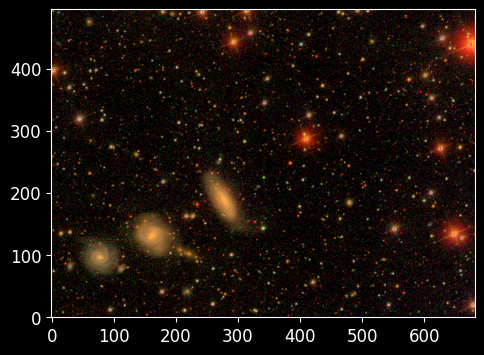

In [41]:
### Read in the three images downloaded from here:
g_name = get_pkg_data_filename('visualization/reprojected_sdss_g.fits.bz2')
r_name = get_pkg_data_filename('visualization/reprojected_sdss_r.fits.bz2')
i_name = get_pkg_data_filename('visualization/reprojected_sdss_i.fits.bz2')

### This is a 3-colors composed image
g = fits.open(g_name)[0].data
r = fits.open(r_name)[0].data
i = fits.open(i_name)[0].data

### We can play with the contrast and colors by changing ! and stretch values
rgb = make_lupton_rgb(i, r, g, Q=10, stretch=0.1) 

### Now we create the plot
plt.style.use("dark_background")

plt.figure(figsize=(6,4))

plt.imshow(rgb, origin='lower') # In astronomy it is common to put the (0,0) pixel on the bottom-left corner

plt.show()

----
-----

Final important point: Don't be afraid to read the documentations, they are `useful`.

Thanks for participating! 

![](imgs/matplotlib_meme.jpeg)

